
<h1> <p style=" font-family: "Times New Roman", Times, serif;">Introduction</p></h1>

<i><b>Traditional approaches to valuing real estate can lean towards the qualitative side, relying more on intuition over sound rationale. Linear regression analysis, however, can offer a robust model  transactions in an area, to provide better guidance on property valuations.</b></i>

<p style="font-family:verdana;">Regression analysis offers a more scientific approach for real estate valuation</p>
<ul>  
<li>Traditionally, there are three approaches for valuing property: comparable sales, income, and cost.</li>
<li>Regression models provide an alternative that is more flexible and objective. It is also a process that once a model is made, becomes autonomous, allowing for real estate entrepreneurs to focus on their core competencies.</li>
<li>A model can be built with numerous variables that are tested for impact on the value of a property, such as square footage and the number of bedrooms.</li>
<li>Regressions are not a magic bullet. There is always the danger that variables contain autocorrelation and/or multicollinearity, or that correlation between variables is spurious</li>
</ul>


<p style="font-family:verdana;">This notebook  is about  build a Linear regression model for predicting the house price.</p>

<h2>Dataset</h2>
The data set is Real estate price prediction that is used for regression analysis, mutiple regression,linear regression, prediction. Since house price is a continues variable, this is a regression problem. The data contains 8columns that include sixFeatures(X) and one Label(y): house price of unit area.

<h3>Import libraries and dataset.</h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Create dataframe from a Real estate price prediction dataset.

df = pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')


<h3>check out the data</h3>

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.shape

(414, 8)

In [7]:
df.describe

<bound method NDFrame.describe of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4

<h3>EDA</h3>

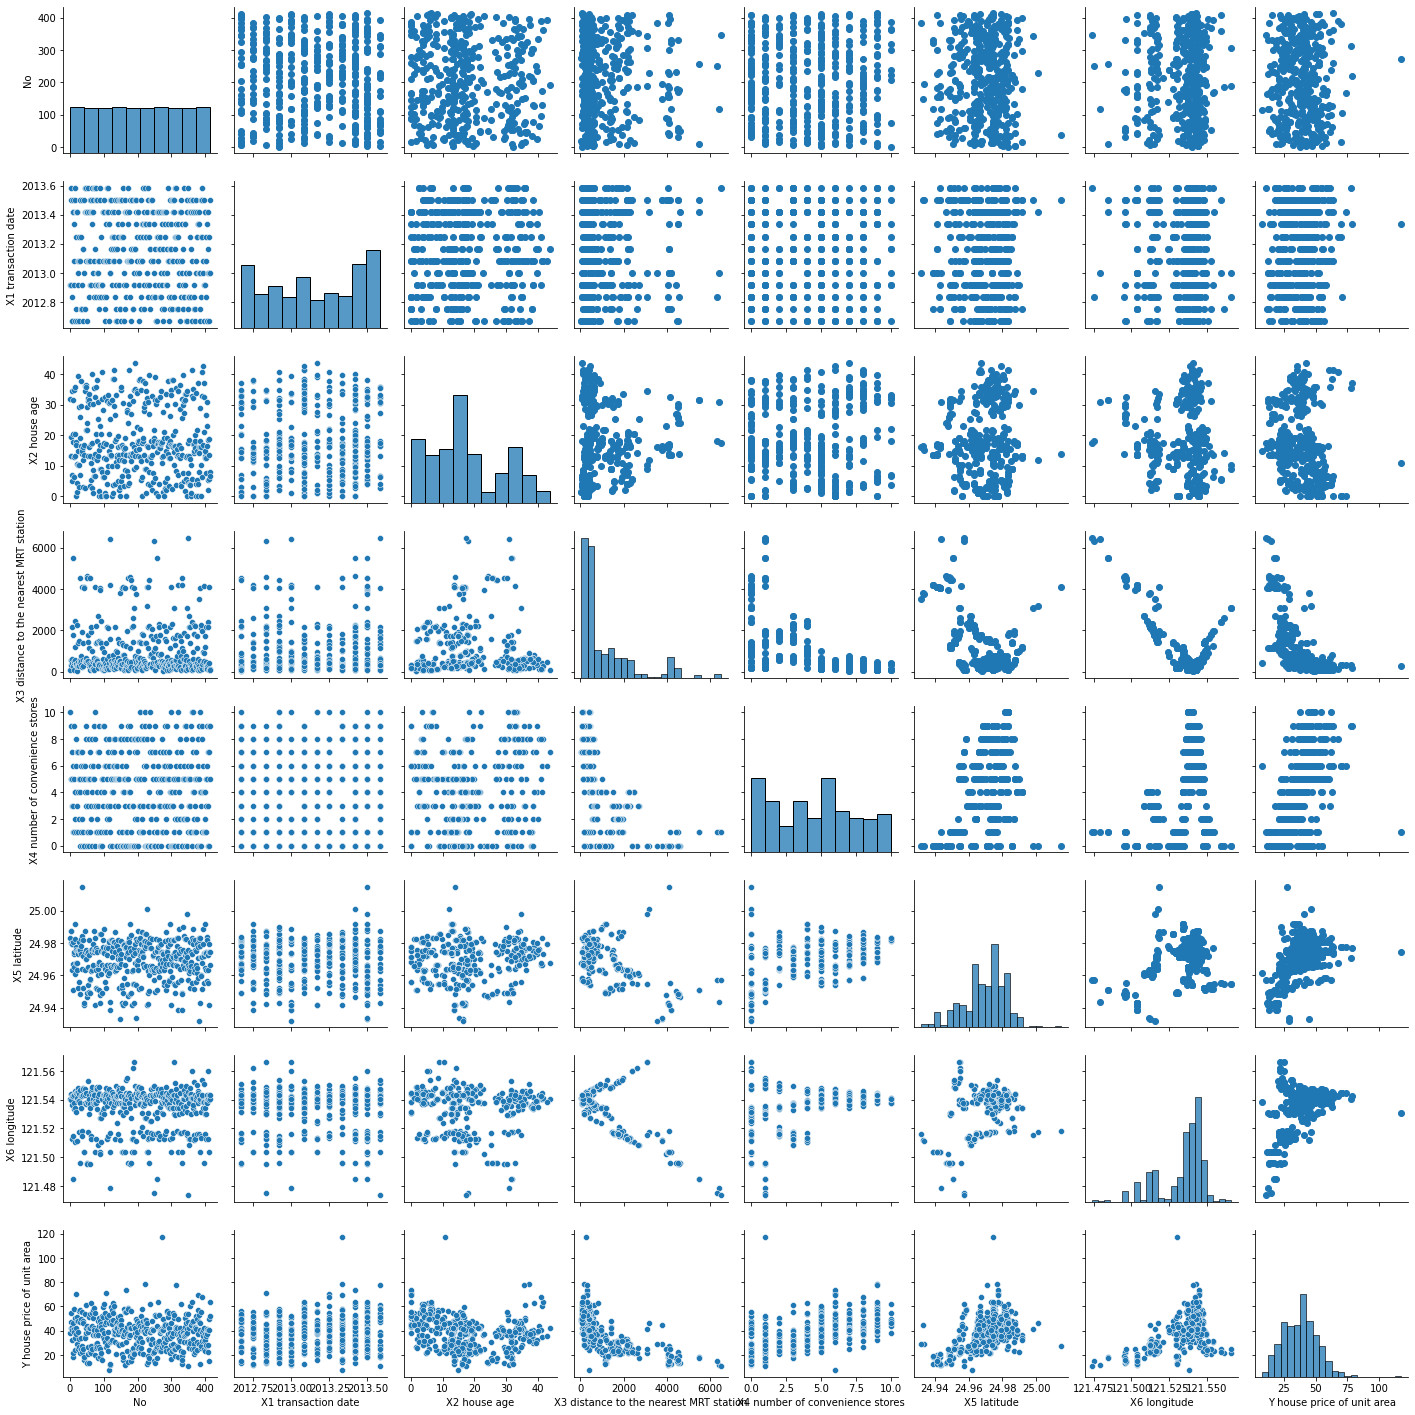

In [8]:
g= sns.pairplot(df)
g.map_upper(plt.scatter)

In [9]:
# find the pairwise correlation of all columns in the dataframe.


df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

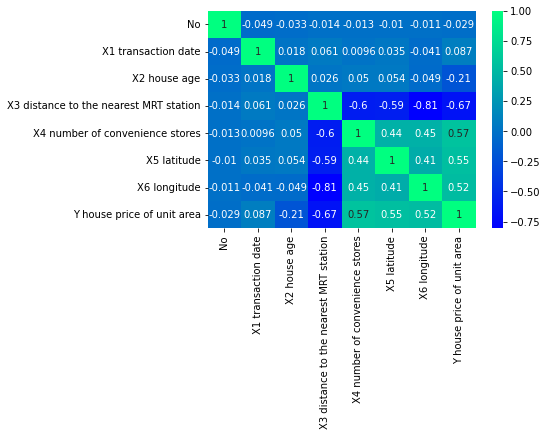

In [10]:
#Heatmap for correlation
sns.heatmap(df.corr(), annot=True,cmap='winter')

Text(0.5, 6.79999999999999, 'house price of unit area')

<Figure size 720x288 with 0 Axes>

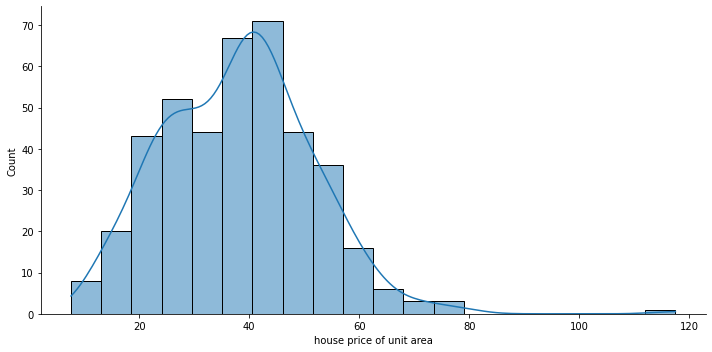

In [11]:
plt.figure(figsize=(10,4))
sns.displot(df['Y house price of unit area'],kde=True,bins=20, aspect=2)
plt.xlabel('house price of unit area')

<AxesSubplot:xlabel='Y house price of unit area'>

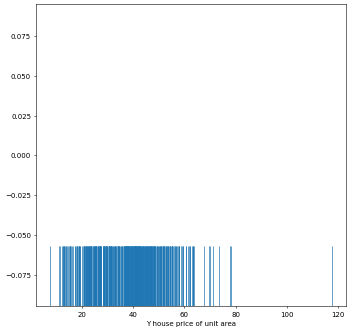

In [12]:
plt.figure(figsize=(8, 8), dpi=50)

sns.rugplot(df['Y house price of unit area'], height=0.2)



<AxesSubplot:xlabel='X1 transaction date', ylabel='Y house price of unit area'>

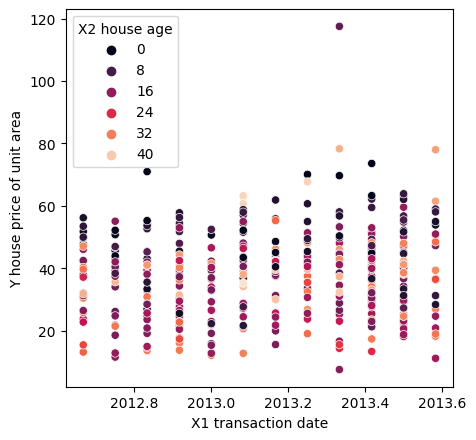

In [13]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X1 transaction date'] , hue= 'X2 house age', palette="rocket")


<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

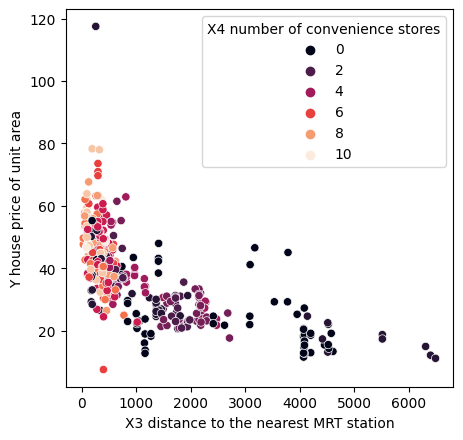

In [14]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X3 distance to the nearest MRT station'] , hue= 'X4 number of convenience stores', palette="rocket")

<AxesSubplot:xlabel='X5 latitude', ylabel='Y house price of unit area'>

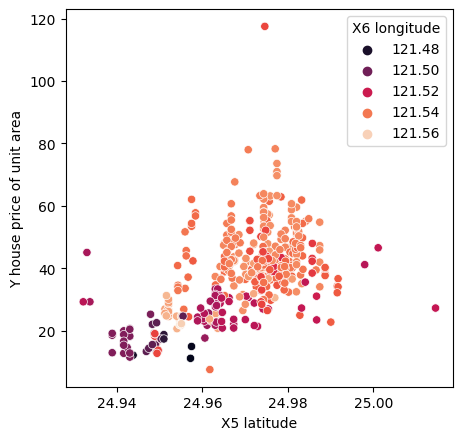

In [15]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X5 latitude'] , hue= 'X6 longitude', palette="rocket")

<h1>Training a Linear Regression Model</h1>

<p>First <b>split</b> up the data into an X array that contains the <b>features</b> to train on, and a y array with the <b>target</b> variable, in this case the (Y house price of unit area) column.<p>

In [16]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']


<p><b>Split</b> a data into <b>train</b> and <b>test</b></p>

In [17]:
# train out model on the training set and then use the test set to evaluate the model.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 101)


<h3>Training model</h3>

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (X_train, y_train)

LinearRegression()

<H3>Regression</H3>


In [19]:
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coedicients'])

,Coedicients
No,-0.002924
X1 transaction date,4.686684
X2 house age,-0.275675
X3 distance to the nearest MRT station,-0.004249
X4 number of convenience stores,1.178325
X5 latitude,240.947692
X6 longitude,18.669459


<h3>Test data predictions</h3>

In [20]:
y_pred = lin_reg.predict(X_test)

<h3>Regression Evaluation Metrics</h3>
<ul><b>
    <li>1-MeanAbsolute Error.</li>
    <li>2-Mean Squared Error.</li>
    <li>3-R^2</li>
   </b>
  </ul>

In [21]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])


,Metrics
MAE,5.373025
MSE,45.880307
RMSE,6.773500


In [22]:
df['Y house price of unit area'] .mean()

37.98019323671498

<h3>Residual plots</h3>

In [23]:
test_residuals=y_test - y_pred

Text(0, 0.5, 'Y-Pred')

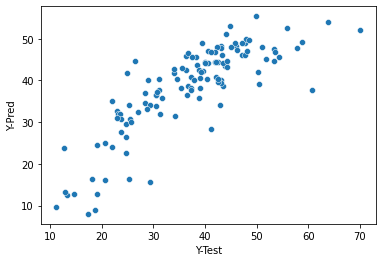

In [24]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

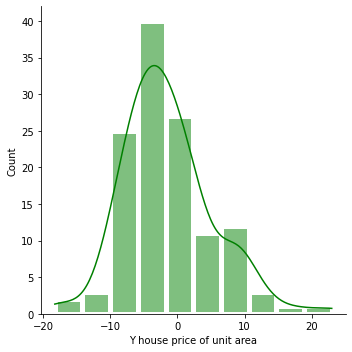

In [25]:
sns.displot(test_residuals, bins=10, kde=True ,color='g', edgecolor='white', linewidth=5)


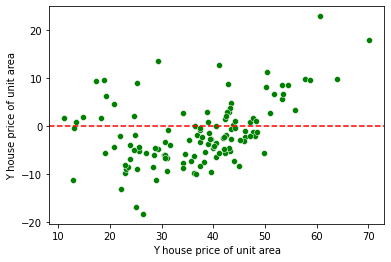

In [26]:
sns.scatterplot(x=y_test, y=test_residuals, color = 'g')
plt.axhline(y=0, color='r', ls='--')